**Banking Transaction Analysis**
- This is an analysis of Banking Transaction Analysis.
- It contains:
    - UserID
    - TransactionID
    - Merchat
    - Amount
    - Category
    - etc,
- This is an large datset with 15k rows

**Plan**
- User Behaviour Analyis
- Clustering of data
- Fraud Detection
- Visualizing Where ever possible

In [259]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**Steps**
- **1.** Import required libraries
    - **a.** `pandas`: used to analyze and clean the data. create clusters and pivot table
    - **b.** `matplotlib.pyplot` : used to visualize the data to make the analysis and describing the analysis easier.
    - **c.** `seaborn`: used to visualize and check for outlier, and plot `pairplots`.

In [260]:
df = pd.read_csv('Banking.csv')
df.head()


,TransactionID,UserID,Date,TransactionType,Category,Merchant,Amount,CardType,IsFraud
0,1,U1102,2024-11-12 13:00:00,ONLINE,Bills,PetrolPump,12193.87,Debit,1
1,2,U1435,2022-01-15 22:00:00,UPI,Shopping,PetrolPump,10022.25,Credit,0
2,3,U1348,2022-02-05 09:00:00,UPI,Fuel,Myntra,2067.44,Credit,1
3,4,U1270,2022-11-09 10:00:00,POS,EMI,PetrolPump,13603.55,Debit,0
4,5,U1106,2022-07-08 10:00:00,CARD,Bills,PetrolPump,10786.34,Credit,0


**Reading CSV**
- To read the CSV file in the local storage, we need to run `pd.read_csv('filename.csv')`.
- We have stored it in a variable named `df` or `DataFrame`.
- Output a small chunk of data to sample check.

In [ ]:
df.describe()


,TransactionID,Amount,IsFraud
count,15000.000000,15000.000000,15000.000000
mean,7500.500000,7587.566749,0.062067
std,4330.271354,4331.865450,0.241285
min,1.000000,50.710000,0.000000
25%,3750.750000,3853.887500,0.000000
50%,7500.500000,7572.720000,0.000000
75%,11250.250000,11402.992500,0.000000
max,15000.000000,14998.430000,1.000000


- df.describe is used to get overall stats of the CSV. 
- This includes:
    - Total Count
    - Mean
    - Min
    - Max and more.

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    15000 non-null  int64  
 1   UserID           15000 non-null  object 
 2   Date             15000 non-null  object 
 3   TransactionType  15000 non-null  object 
 4   Category         15000 non-null  object 
 5   Merchant         15000 non-null  object 
 6   Amount           15000 non-null  float64
 7   CardType         15000 non-null  object 
 8   IsFraud          15000 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 1.0+ MB


**Info**
- This us about the Dtype and if the data is nullable. 
- If the data is non-null then we know for sure there are no null values.
- We have to check if the Date is in the Dtype of Datetime, if not we have to convert the Dtype of Date.

In [263]:
nullcount = df.isna().sum()
nullcount


TransactionID      0
UserID             0
Date               0
TransactionType    0
Category           0
Merchant           0
Amount             0
CardType           0
IsFraud            0
dtype: int64

**NA values**
- Checking if there are any `null` or `NaN` Values in the dataset.
- No `null` values are present in the dataset.
- If they were present we would have to run:
    - `df.fillna(0)` : This is replace all the null or na values with an 0 to remove errors or blank cells.

Text(0.5, 1.0, 'Outlier: Amount vs Category')

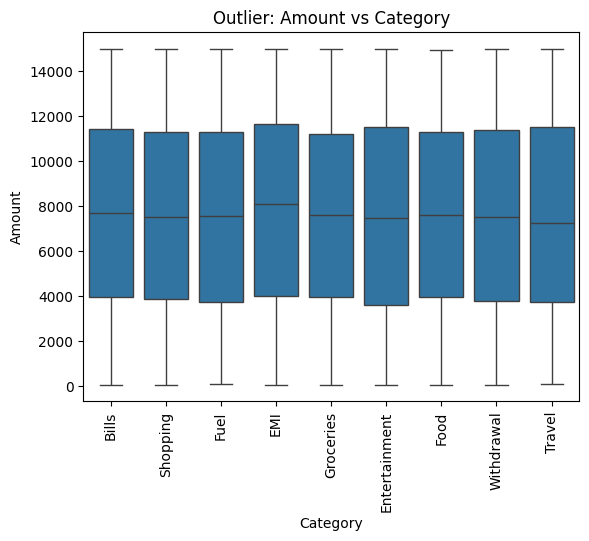

In [264]:
sns.boxplot(data=df,x='Category',y='Amount')
plt.xticks(rotation=90)
plt.title('Outlier: Amount vs Category')


Text(0.5, 1.0, 'Outlier: Amount vs Merchant')

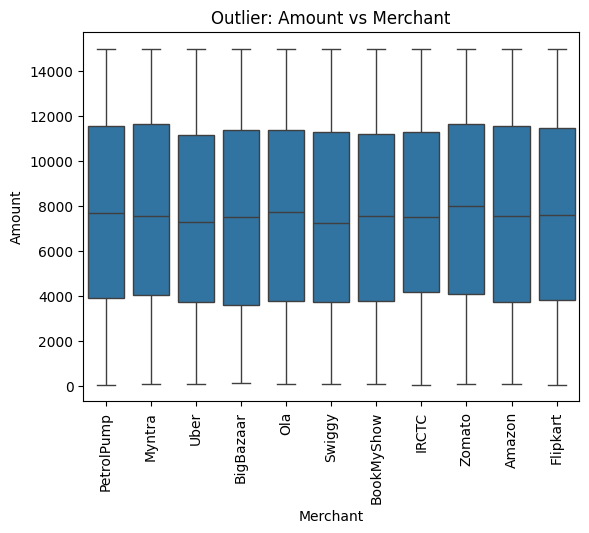

In [265]:
sns.boxplot(data=df,x='Merchant',y='Amount')
plt.xticks(rotation=90)
plt.title('Outlier: Amount vs Merchant')


Text(0.5, 1.0, 'Outlier: Amount vs Transaction Type')

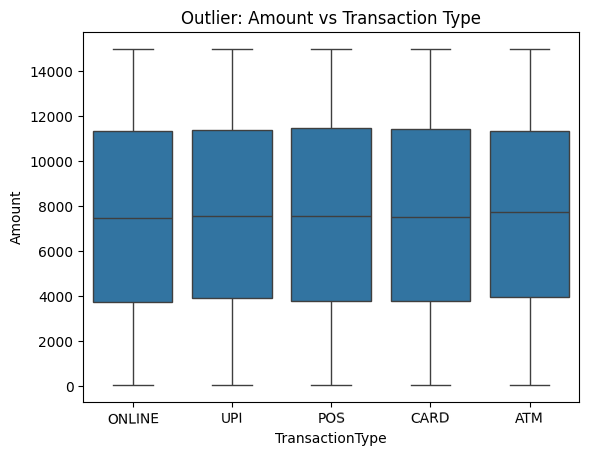

In [266]:
sns.boxplot(data=df,x='TransactionType',y='Amount')
plt.xticks(rotation=1)
plt.title('Outlier: Amount vs Transaction Type')


**Outlier Check: Category vs Amount**

- **Median**: The horizontal line between the boxes is the Median line.
- **Interquartile Range**: This is the Box in which the line is present. This shows the variation in transaction amount in each category.
- **Whiskers**: These are the lines extending from the box. This shows the lower and higher extremes.
- **Outlier**: No outlier values are present so we know there are no extreme values and no unsual values in the dataset.

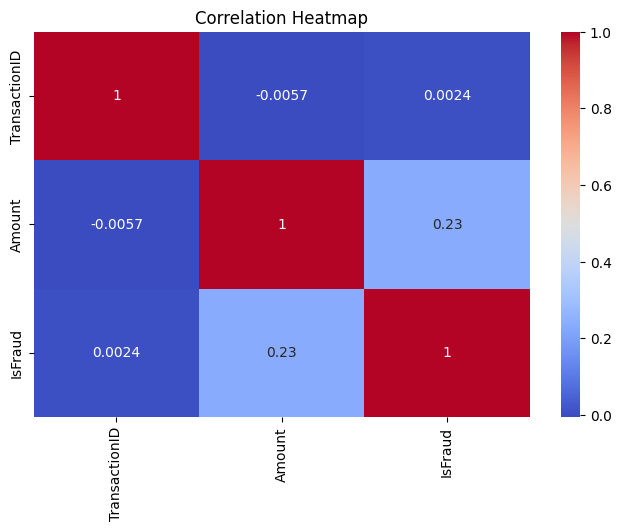

In [ ]:
num = df.select_dtypes(include=['int64','float64'])

plt.figure(figsize=(8,5))
sns.heatmap(num.corr(),annot=True,cmap='coolwarm')
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.title('Correlation Heatmap')
plt.show()


In [268]:
df[['Date','Time']] = df['Date'].str.split(' ',expand=True)
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time']).dt.time

df.head()


C:\Users\User\AppData\Local\Temp\ipykernel_21084\793363166.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time']).dt.time


,TransactionID,UserID,Date,TransactionType,Category,Merchant,Amount,CardType,IsFraud,Time
0,1,U1102,2024-11-12,ONLINE,Bills,PetrolPump,12193.87,Debit,1,13:00:00
1,2,U1435,2022-01-15,UPI,Shopping,PetrolPump,10022.25,Credit,0,22:00:00
2,3,U1348,2022-02-05,UPI,Fuel,Myntra,2067.44,Credit,1,09:00:00
3,4,U1270,2022-11-09,POS,EMI,PetrolPump,13603.55,Debit,0,10:00:00
4,5,U1106,2022-07-08,CARD,Bills,PetrolPump,10786.34,Credit,0,10:00:00


**DateTime**
- In the dataset we had column name Date which contains both date and time of the transaction.
- We should split them into two different columns for better understanding of the data and make it easier to analyze.

**What we did**
- We first split the Date column into two columns names Date and Time.
- Once two different columns are created we converted thier dataType from `String` to `DateTime`.
- This ensures it is readed as Datetime when we create visuals and not read it as string.

In [269]:
countFraud = (df['IsFraud'] == 1).sum()
TotalCount = df['IsFraud'].count()

fraudPerc = ((countFraud/TotalCount) * 100).round(2)

# Fraud count per user
fraudUser = (
    df.groupby(['UserID','TransactionType','Merchant'])['IsFraud']
      .sum()
      .sort_values(ascending=False)
      .reset_index()
)

fraudUser = fraudUser[fraudUser['IsFraud'] > 0]
# Rename column
fraudUser.rename(columns={'IsFraud': 'No. of Fraud'}, inplace=True)

fraudUser.head(10)


,UserID,TransactionType,Merchant,No. of Fraud
0,U1375,ONLINE,Flipkart,3
1,U1030,ONLINE,Swiggy,2
2,U1121,ONLINE,IRCTC,2
3,U1031,ONLINE,Flipkart,2
4,U1112,ONLINE,BookMyShow,2
5,U1026,ONLINE,IRCTC,2
6,U1015,ONLINE,Swiggy,2
7,U1245,ONLINE,Ola,2
8,U1086,ONLINE,BigBazaar,2
9,U1151,ONLINE,Myntra,2


**Fraud Analysis**
- In this dataset fraudalent transactions are marked with `boolean` values. **(1,0)**
- This makes it easier to understand the dataset.
- After analyzing, we found out:
    - Most of the frauds are done using `ONLINE` Transactions.
    - `Flipkart` was scammed by 3 times by an single user
- Futher we'll check in which timeperiod was this fraud done.

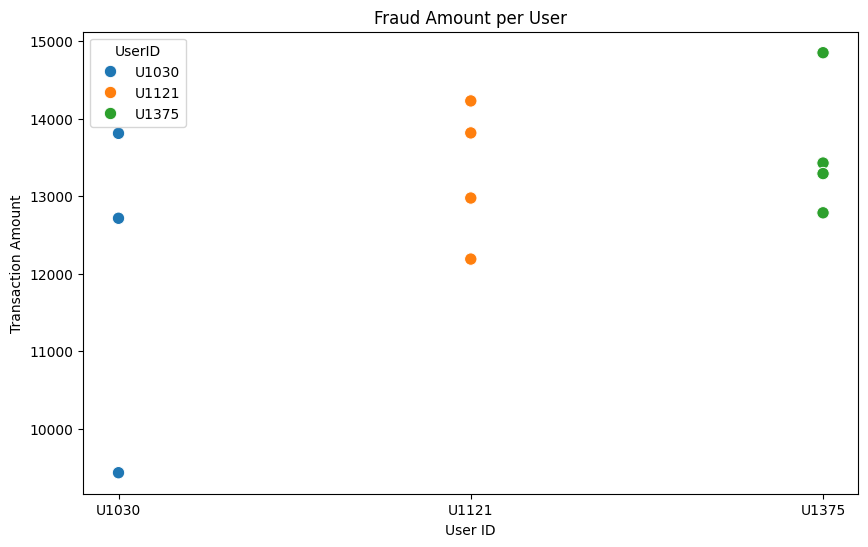

In [270]:
fraudUserDateTime = df[
    (df['IsFraud'] > 0) &
    (df['UserID'].isin(["U1375", "U1030", "U1121"]))
].sort_values(by='UserID')

plt.figure(figsize=(10,6))
sns.scatterplot(data=fraudUserDateTime, x='UserID', y='Amount', hue='UserID', s=80)
plt.title("Fraud Amount per User")
plt.xlabel("User ID")
plt.ylabel("Transaction Amount")
plt.show()


**Further Analysis**
- In further analysis picked 3 users who had more fraudalent transactions than any other.
- We found out these user do not fraud frequently or periodically.
- These transactions might have been marked as Fraud due to some other error during processing of the transaction

In [ ]:
df.groupby('Merchant')['IsFraud'].sum().sort_values(ascending=False)


Merchant
Zomato        119
Myntra        100
PetrolPump     93
Amazon         85
Swiggy         85
Flipkart       84
IRCTC          80
BookMyShow     75
Ola            73
BigBazaar      70
Uber           67
Name: IsFraud, dtype: int64

**Fraud By Merchant** 
- This is the list of Merchant which got fraud by the end users.
- It is an total count.

<Axes: xlabel='hour', ylabel='count'>

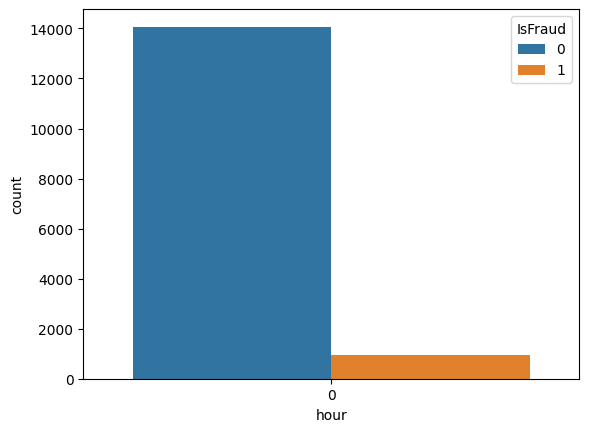

In [ ]:
df["hour"] = pd.to_datetime(df['Date'], format="%H:%M:%S").dt.hour

sns.countplot(x=df['hour'], hue=df['IsFraud'])


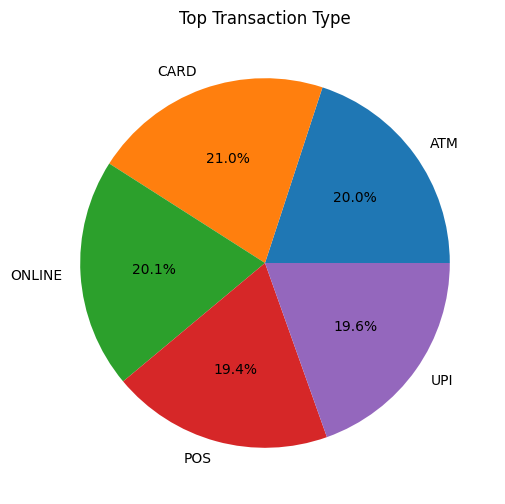

In [271]:
TopTransactionMerchant = df.groupby(['TransactionType'])['Amount'].sum().reset_index()

values = [int(x) for x in TopTransactionMerchant['Amount']]
labels = TopTransactionMerchant['TransactionType']

plt.figure(figsize=(10,6))
plt.pie(values, labels=labels,autopct='%1.1f%%' )  # Use labels=labels
plt.title('Top Transaction Type')
plt.show()


**Top Transaction Type**
- All the transaction are mostly balanced. 
- Every Mode of payment is equally used by the end users.
- Still Card payment is the most used.
**Next**
- Futher we'll see which user has the most card usage.
- This will help the company to send personalized offers to the user.

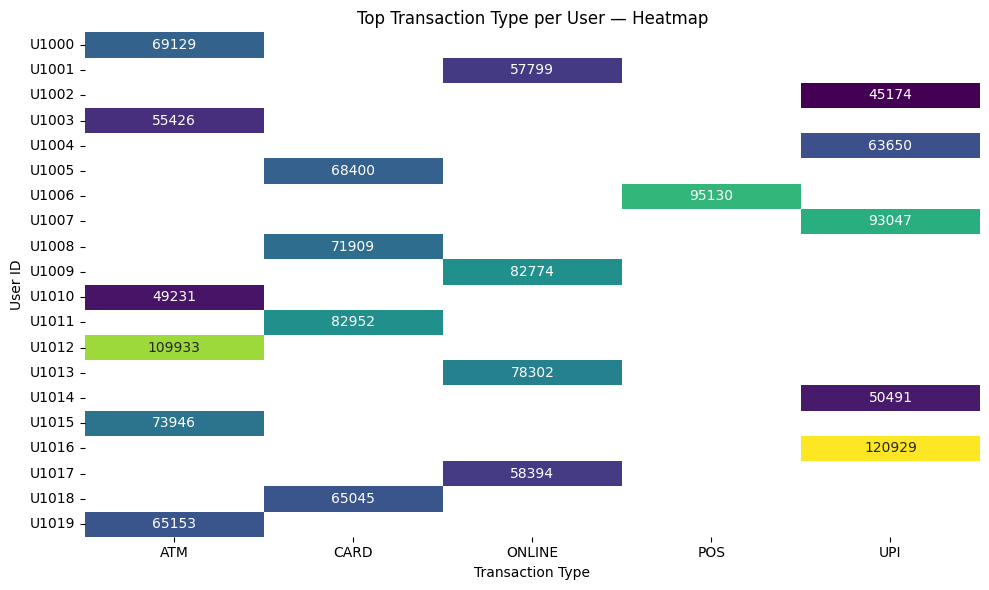

In [272]:
TopTransaction = (
    df.groupby(['UserID','TransactionType'])['Amount'].sum().reset_index().sort_values(['UserID','Amount'],ascending=[True,False])
    )

TopUsage = (
    TopTransaction.sort_values(['UserID','Amount'],ascending=[True,False])
    .groupby('UserID')
    .head(1)
    .reset_index(drop=True)
).dropna()

pivot_usage = TopUsage.pivot(
    index='UserID',
    columns=('TransactionType'),
    values='Amount'
).head(20)
mask = pivot_usage.isna() | (pivot_usage == 0)

plt.figure(figsize=(10,6))
sns.heatmap(
    pivot_usage,
    cmap='viridis',
    annot=True,
    fmt='.0f',
    mask=mask,     # hides NaN, 0, empty cells
    cbar=False     # optional: hide color bar
)
plt.title("Top Transaction Type per User — Heatmap")
plt.xlabel("Transaction Type")
plt.ylabel("User ID")
plt.tight_layout()
plt.show()


**TOP TRANSACTION BY USER**
- Here we can see what type of transaction does the user uses the most.
- This will help the bank to send personalized offers and rewards to the users

Total: 15000 
Debit: 7601 
Credit: 7399


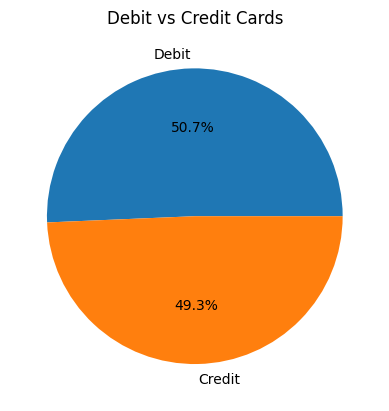

In [273]:
TotalCards = df['CardType'].count()

debit = df[df['CardType'] == "Debit"]['UserID'].count()
credit = TotalCards - debit

print(f"Total: {TotalCards} \nDebit: {debit} \nCredit: {credit}")

# Create dataframe properly
CardTotal = pd.DataFrame({
    'Debit': [debit],
    'Credit': [credit],
    'Total': [TotalCards]
})

plt.pie([debit, credit], labels=['Debit','Credit'], autopct='%1.1f%%')
plt.title("Debit vs Credit Cards")
plt.show()



**Debit Card V/s Credit Card**
- Analyzing what users prefer to use more. 
- With this analysis we found out, More people prefer to use Debit cards rather than Credit Cards.
- But the percentage difference is very low which shouldn't even matter to the company.
- They can also roll out offers for credit cards to balance out the percentages or even get better credit card usage rates.


Text(0.5, 1.0, 'Average Spending by Category')

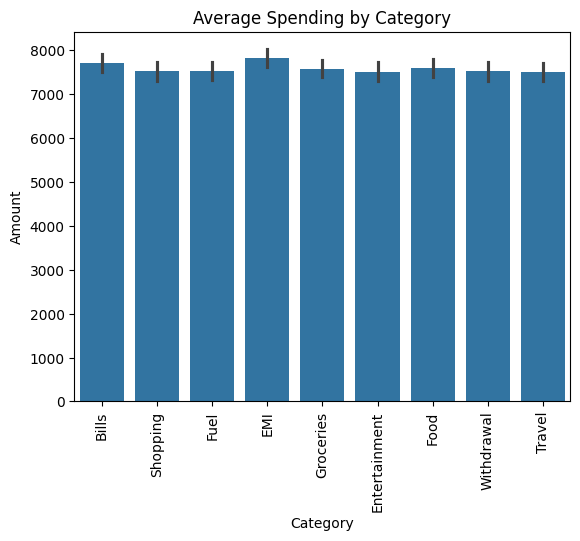

In [ ]:
sns.barplot(x='Category', y='Amount',data=df)
plt.xticks(rotation=90)
plt.title('Average Spending by Category')


**Average Spendings**
- This shows the average spendings of the user by Category.
- We can see most amount of money is spend on `EMI`.
- Least amount is spent upon shopping.

In [278]:
df.groupby("UserID")["Amount"].sum().nlargest(10)


UserID
U1270    394969.78
U1312    369414.71
U1272    361179.35
U1416    360909.05
U1368    350642.03
U1153    348735.57
U1213    347123.51
U1215    344925.68
U1038    339612.50
U1287    337158.68
Name: Amount, dtype: float64

**Top Spenders**
- This shows us the top spenders of all time.
- User with UserID `U1270` has spent the most amount in this bank.

**Final Insights**
- Fraud occurs mostly in online transactions above `12000 rs`.
- Merchant with most frauds is `Zomato`.
- High-spendings users are mainly `U1270` . `U1312` and `U1272`.
- ATM withdrawls rarely show frauds.
- Fuel and EMI categories have stable amounts.
- All transaction modes have a very stable usage.
- Most Frauds are done by user `1030` `1121` and `1370`.
